In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:

import os
import glob
import time
import os
from PIL import Image
import pathlib
import csv
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

In [ ]:
emg_len =[]
test_path_em = '/content/drive/MyDrive/cleaned_data/eval_balanced/Emergency'
test_path_nonem = '/content/drive/MyDrive/cleaned_data/eval_balanced/nonEmergency'

test_em_files = glob.glob(os.path.join(test_path_em, '*.wav'))
test_nonem_files = glob.glob(os.path.join(test_path_nonem, '*.wav'))   
for fn in tqdm(test_em_files):
    y, sr = librosa.load(fn, sr=8000)
    c = librosa.get_duration(y=y , sr=sr)
    emg_len.append(c)

100%|██████████| 134/134 [00:36<00:00,  3.71it/s]


In [ ]:
nonemg_len = []
for fn in tqdm(test_nonem_files):
    y, sr = librosa.load(fn, sr=8000)
    d = librosa.get_duration(y=y , sr=sr)
    nonemg_len.append(d)

100%|██████████| 105/105 [00:57<00:00,  1.83it/s]


In [ ]:
print(min(emg_len))
print(max(emg_len))
print(min(nonemg_len))
print(max(nonemg_len))

2.040875
10.031125
0.97525
10.031125


In [ ]:
file = open('dataset.csv', 'w', newline='')

In [ ]:
g="Emergency"
test_path_em = '/content/drive/MyDrive/cleaned_data/eval_balanced/Emergency'
test_em_files = glob.glob(os.path.join(test_path_em, '*.wav'))
for fn in tqdm(test_em_files):
    y, sr = librosa.load(fn, sr=8000,duration=1.2)
    rmse = librosa.feature.rms(y=y)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    to_append = f'{fn} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
    for e in mfcc:
        to_append += f' {np.mean(e)}'
    to_append += f' {g}'
    file = open('dataset.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

100%|██████████| 134/134 [00:12<00:00, 10.85it/s]


In [ ]:
col_names = ["fn","chroma_stft","spectral_centroid","spectral_bandwidth","rolloff","zero_crossing_rate","mfcc1","mfcc2","mfcc3","mfcc4","mfcc5","mfcc6","mfcc7","mfcc8","mfcc9","mfcc10","mfcc11","mfcc12","mfcc13","mfcc14","mfcc15","mfcc16","mfcc17","mfcc18","mfcc19","mfcc20","label" ]
data = pd.read_csv("dataset.csv", names=col_names)

In [ ]:
data.head()

,fn,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
/content/drive/MyDrive/cleaned_data/eval_balanced/Emergency/111.wav,0.359888,0.022418,1691.023429,1050.217875,3053.865132,0.341797,-176.199875,9.396546,-26.900452,-23.563782,...,11.180789,-4.846173,5.861305,-12.960463,0.016321,-8.153287,5.809633,-16.402901,1.043569,Emergency
/content/drive/MyDrive/cleaned_data/eval_balanced/Emergency/38.wav,0.184713,0.261795,1386.270311,867.037838,2484.991776,0.250051,16.246666,31.595346,-43.716919,4.178284,...,11.812840,-3.162781,1.284324,-14.624017,12.920669,-4.154139,12.581067,-10.153343,7.445230,Emergency
/content/drive/MyDrive/cleaned_data/eval_balanced/Emergency/116.wav,0.296703,0.086959,1110.008709,823.776240,1973.273026,0.219521,-71.506096,77.245155,-39.881645,10.596503,...,5.542479,-17.292812,-1.127933,-19.014076,-2.651380,-13.399012,6.426832,-8.545753,3.339379,Emergency
/content/drive/MyDrive/cleaned_data/eval_balanced/Emergency/16.wav,0.236266,0.150544,1630.643238,1015.411253,3015.008224,0.328253,-65.522743,22.495201,-3.594737,14.181441,...,27.544928,9.073138,-2.342510,-41.532642,13.235374,-1.654400,-11.185779,-14.710364,15.451639,Emergency
/content/drive/MyDrive/cleaned_data/eval_balanced/Emergency/102.wav,0.398128,0.172077,1121.344126,880.769551,2095.805921,0.208316,25.736961,76.779335,-33.327293,10.376517,...,-4.165341,-19.773989,1.516146,-23.156332,15.485725,-10.933682,-2.958074,-12.240003,-1.391870,Emergency


In [ ]:
file_1 = open('dataset_1.csv', 'w', newline='')

In [ ]:
k="NonEmergency"
test_path_nonem = '/content/drive/MyDrive/cleaned_data/eval_balanced/nonEmergency'
test_nonem_files = glob.glob(os.path.join(test_path_nonem, '*.wav'))
for fn in tqdm(test_nonem_files):
    y, sr = librosa.load(fn, sr=8000, duration=1.2)
    rmse = librosa.feature.rms(y=y)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    to_append = f'{fn} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
    for e in mfcc:
        to_append += f' {np.mean(e)}'
    to_append += f' {k}'
    file_1 = open('dataset_1.csv', 'a', newline='')
    with file_1:
        writer = csv.writer(file_1)
        writer.writerow(to_append.split())

100%|██████████| 105/105 [00:10<00:00,  9.56it/s]


In [ ]:
col_names = ["fn","chroma_stft","spectral_centroid","spectral_bandwidth","rolloff","zero_crossing_rate","mfcc1","mfcc2","mfcc3","mfcc4","mfcc5","mfcc6","mfcc7","mfcc8","mfcc9","mfcc10","mfcc11","mfcc12","mfcc13","mfcc14","mfcc15","mfcc16","mfcc17","mfcc18","mfcc19","mfcc20","label" ]
data_1 = pd.read_csv("dataset_1.csv", names=col_names)

In [ ]:
data_1.head()

,fn,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
/content/drive/MyDrive/cleaned_data/eval_balanced/nonEmergency/301.wav,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1131.370850,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NonEmergency
/content/drive/MyDrive/cleaned_data/eval_balanced/nonEmergency/261.wav,0.378013,0.008660,1385.118361,929.901200,2471.833882,0.216103,-331.451355,41.033829,-35.926971,30.013107,...,-0.013487,-18.358383,10.226459,-15.888884,9.078642,-13.824585,1.942911,-7.344435,7.727440,NonEmergency
/content/drive/MyDrive/cleaned_data/eval_balanced/nonEmergency/103.wav,0.369651,0.153829,1443.665702,949.954131,2636.513158,0.273977,19.256922,31.000765,-47.047779,-8.736856,...,3.107050,-18.080997,-2.639697,-14.444845,9.793187,-10.608210,9.855652,-8.159681,13.212410,NonEmergency
/content/drive/MyDrive/cleaned_data/eval_balanced/nonEmergency/260.wav,0.201255,0.153586,717.285793,692.383826,1209.498355,0.078819,-97.409050,122.995461,-21.493015,1.323246,...,-5.310225,-21.719917,-1.442775,-15.418762,3.007892,-13.602205,-0.410611,-10.582010,-0.367853,NonEmergency
/content/drive/MyDrive/cleaned_data/eval_balanced/nonEmergency/263.wav,0.659377,0.013416,1620.158233,1054.407797,2938.527961,0.316895,-206.687820,28.353741,-16.759069,17.896383,...,-0.536909,-18.297926,4.023561,-18.227354,7.423972,-12.853503,4.891646,-16.307693,4.050445,NonEmergency


In [ ]:
print(data.label.value_counts())
print(data_1.label.value_counts())

Emergency    134
Name: label, dtype: int64
NonEmergency    105
Name: label, dtype: int64


In [ ]:
train = pd.concat([data , data_1]) 

In [ ]:
print(data.shape)
print(data_1.shape)
print(train.shape)


(134, 27)
(105, 27)
(239, 27)


In [ ]:
train.label.value_counts()

Emergency       134
NonEmergency    105
Name: label, dtype: int64

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

import keras
from keras import layers
from keras import layers
import keras
from keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train.head(5)

,fn,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
/content/drive/MyDrive/cleaned_data/eval_balanced/Emergency/111.wav,0.359888,0.022418,1691.023429,1050.217875,3053.865132,0.341797,-176.199875,9.396546,-26.900452,-23.563782,...,11.180789,-4.846173,5.861305,-12.960463,0.016321,-8.153287,5.809633,-16.402901,1.043569,Emergency
/content/drive/MyDrive/cleaned_data/eval_balanced/Emergency/38.wav,0.184713,0.261795,1386.270311,867.037838,2484.991776,0.250051,16.246666,31.595346,-43.716919,4.178284,...,11.812840,-3.162781,1.284324,-14.624017,12.920669,-4.154139,12.581067,-10.153343,7.445230,Emergency
/content/drive/MyDrive/cleaned_data/eval_balanced/Emergency/116.wav,0.296703,0.086959,1110.008709,823.776240,1973.273026,0.219521,-71.506096,77.245155,-39.881645,10.596503,...,5.542479,-17.292812,-1.127933,-19.014076,-2.651380,-13.399012,6.426832,-8.545753,3.339379,Emergency
/content/drive/MyDrive/cleaned_data/eval_balanced/Emergency/16.wav,0.236266,0.150544,1630.643238,1015.411253,3015.008224,0.328253,-65.522743,22.495201,-3.594737,14.181441,...,27.544928,9.073138,-2.342510,-41.532642,13.235374,-1.654400,-11.185779,-14.710364,15.451639,Emergency
/content/drive/MyDrive/cleaned_data/eval_balanced/Emergency/102.wav,0.398128,0.172077,1121.344126,880.769551,2095.805921,0.208316,25.736961,76.779335,-33.327293,10.376517,...,-4.165341,-19.773989,1.516146,-23.156332,15.485725,-10.933682,-2.958074,-12.240003,-1.391870,Emergency


In [ ]:
le = LabelEncoder()
train['label'] = le.fit_transform(train['label'])

In [ ]:
y = train.pop("label")

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(train, y , test_size=0.20 , random_state = 1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [ ]:
model.fit(x_train , y_train)

KNeighborsClassifier()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7388888888888888

In [ ]:
from matplotlib.legend_handler import HandlerLine2D

Text(0.5, 0, 'n_neighbors')

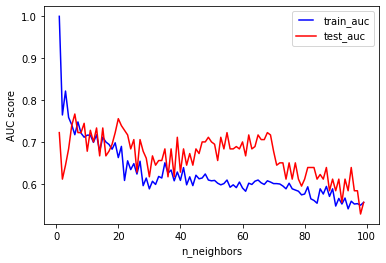

In [ ]:
neighbors = list(range(1,100))
train_results = []
test_results = []
for n in neighbors:
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
line1, = plt.plot(neighbors, train_results, "b" , label = "train_auc")
line2, = plt.plot(neighbors, test_results, "r" , label = "test_auc")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_neighbors")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier(n_neighbors=20)

In [ ]:
model1.fit(x_train , y_train)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
y_pred1 = model1.predict(x_test)

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7555555555555556